In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [58]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [75]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

nb=GaussianNB()

In [77]:
model = nb.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [78]:
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

0.9777777777777777


In [85]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

matrix = confusion_matrix(y_test,y_pred,labels=model.classes_)
print(matrix)

tp,fn,fp,tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


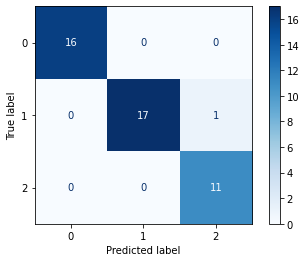

In [86]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [90]:
error_rate = (fp+fn)/(fp+fn+tn+tp)
recall = tp/tp+fn
true_neg_rate = tn/tn+fp
precision = tp/tp+fp
false_pos_rate=fp/tn+fp

print('error rate',error_rate)
print('\nrecall',recall)
print('\ntrue neg rate',true_neg_rate)
print('\nprecision',precision)
print('false pos rate',false_pos_rate)

error rate 0.0

recall 1.0

true neg rate 1.0

precision 1.0
false pos rate 0.0
